## CMPINF 2100 Week 11 | Working with CATEGORICAL or NON-NUMERIC Inputs

You will learn how FEATURES are generated to allow NON-NUMERIC values to be used in LINEAR MODELS!

We need these newe types of features because ULTIMATELY linear models require MULTIPLYING SLOPES with NUMERIC INPUTS!

The models cannot handle non-numeric input values by themselves!

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

### Read Data

In [3]:
df = pd.read_csv('week_11_categorical_input.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       155 non-null    object 
 1   y       155 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [5]:
df.nunique()

x     10
y    155
dtype: int64

In [6]:
df.isna().sum()

x    0
y    0
dtype: int64

### Explore Data

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


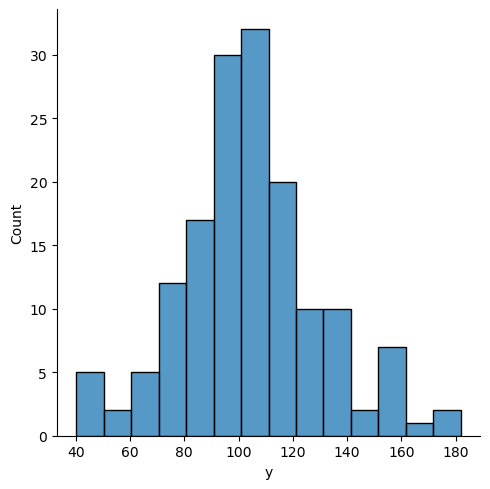

In [7]:
sns.displot(data = df, x='y', kind='hist')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


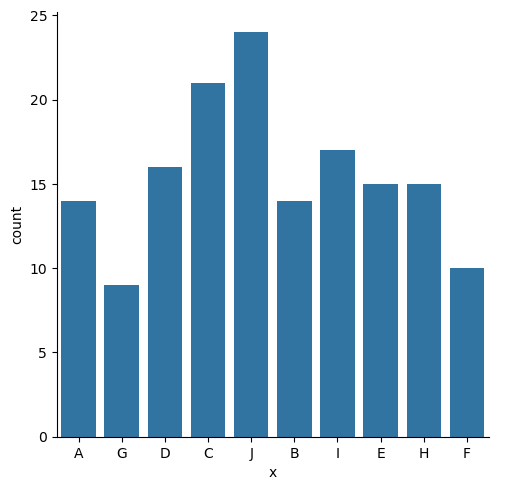

In [8]:
sns.catplot(data=df, x='x', kind='count')

plt.show()

Categorical-to-continuous relationship. We want to know how to CONTINUOUS OUTPUTS relate to the CATEGORICAL INPUT!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


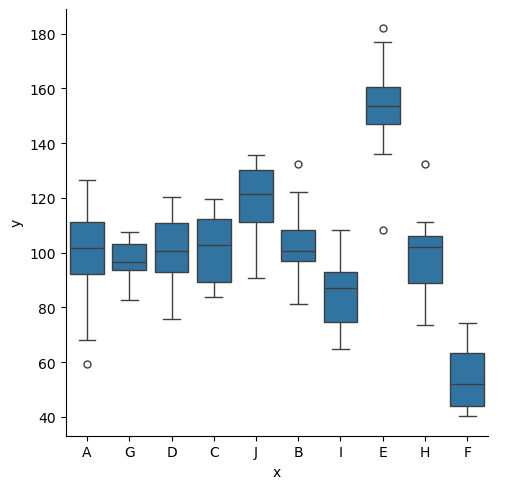

In [9]:
sns.catplot( data=df, x='x', y='y', kind='box')

plt.show()

Let's now examine if the AVERAGE OUTPUT is different across the categories of the categorical input!

This is visualized with a POINT PLOT!

C:\Users\Canye\AppData\Local\Temp\ipykernel_30004\1619109751.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=df, x='x', y='y', kind='point', join=False)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


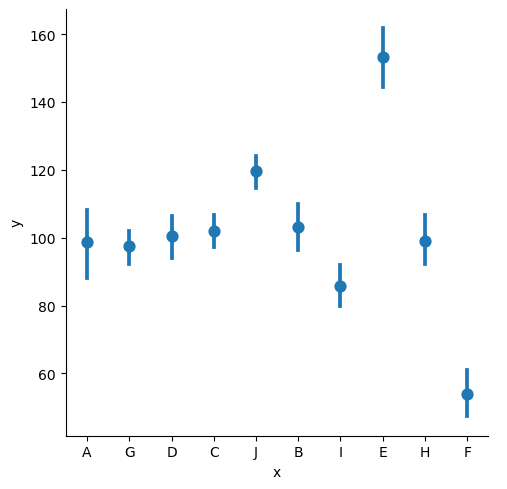

In [10]:
sns.catplot(data=df, x='x', y='y', kind='point', join=False)

plt.show()

Why does this matter when we are talking about LINEAR MODELS?!

We have learned that LINEAR MODELS are fundamentally MODELING the AVERAGE OUTPUT.

When you have categorical inputs... the goal of the LINEAR MODEL is to PREDICT the AVERAGE OUTPUT PER CATEGORY!

But... how can it PREDICT a continuous value when the INPUT is CATEGORICAL?

In [11]:
df

,x,y
0,A,103.324129
1,G,96.530846
2,D,95.772873
3,C,100.190541
4,J,129.608242
...,...,...
150,B,92.286905
151,I,74.533121
152,F,46.537280
153,C,83.826336


### Fit a Linear Model to find out!

Fit a linear model that has a LINEAR ADDITIVE relationship between the AVERAGE OUTPUT (trend) and the INPUT.

In [12]:
fit_a = smf.ols(formula='y ~ x', data=df).fit()

In [13]:
fit_a.params

Intercept    98.727693
x[T.B]        4.474303
x[T.C]        3.175725
x[T.D]        1.795108
x[T.E]       54.654056
x[T.F]      -44.805967
x[T.G]       -1.216043
x[T.H]        0.318738
x[T.I]      -13.041580
x[T.J]       20.836328
dtype: float64

In [14]:
fit_a.params.size

10

But when you have NON-NUMERIC inputs... FEATURES must be DERIVED from the INPUT to allow MULTIPLYING the FEATURE with a SLOPE!

This FEATURE is known as a **DUMMY VARIABLE.**

The DUMMY is a BINARY INDICATOR... it is equal to 0 or 1.

If the DUMMY is equal to 1, then the categorical variable EQUALS that category.

If the DUMMY does NOT equal 1 or equals 0, then the categorical variable does NOT equal that category!

How many DUMMY VARIABLES are created?

In [15]:
df.x.nunique()

10

In [16]:
df.x.nunique() - 1

9

### Dummy Variable Slopes

In [30]:
fit_a.params

Intercept    98.727693
x[T.B]        4.474303
x[T.C]        3.175725
x[T.D]        1.795108
x[T.E]       54.654056
x[T.F]      -44.805967
x[T.G]       -1.216043
x[T.H]        0.318738
x[T.I]      -13.041580
x[T.J]       20.836328
dtype: float64

Look at the AVERAGE output for each CATEGORY.

In [31]:
df.groupby('x').\
aggregate(avg_y = ('y', 'mean')).\
reset_index()

,x,avg_y
0,A,98.727693
1,B,103.201995
2,C,101.903418
3,D,100.522801
4,E,153.381749
5,F,53.921726
6,G,97.511650
7,H,99.046431
8,I,85.686113
9,J,119.564021


In [32]:
avg_y_at_xA = df.loc[ df.x == 'A', 'y'].mean()

In [33]:
avg_y_at_xA

98.72769293463894

In [34]:
df_summary = df.groupby('x').\
aggregate(avg_y = ('y', 'mean')).\
reset_index()

In [35]:
df_summary

,x,avg_y
0,A,98.727693
1,B,103.201995
2,C,101.903418
3,D,100.522801
4,E,153.381749
5,F,53.921726
6,G,97.511650
7,H,99.046431
8,I,85.686113
9,J,119.564021


In [36]:
df_summary['avg_at_xA'] = avg_y_at_xA

In [37]:
df_summary

,x,avg_y,avg_at_xA
0,A,98.727693,98.727693
1,B,103.201995,98.727693
2,C,101.903418,98.727693
3,D,100.522801,98.727693
4,E,153.381749,98.727693
5,F,53.921726,98.727693
6,G,97.511650,98.727693
7,H,99.046431,98.727693
8,I,85.686113,98.727693
9,J,119.564021,98.727693


In [38]:
df_summary['relative_difference_to_xA'] = df_summary.avg_y - df_summary.avg_at_xA

In [39]:
df_summary.round(3)

,x,avg_y,avg_at_xA,relative_difference_to_xA
0,A,98.728,98.728,-0.000
1,B,103.202,98.728,4.474
2,C,101.903,98.728,3.176
3,D,100.523,98.728,1.795
4,E,153.382,98.728,54.654
5,F,53.922,98.728,-44.806
6,G,97.512,98.728,-1.216
7,H,99.046,98.728,0.319
8,I,85.686,98.728,-13.042
9,J,119.564,98.728,20.836


In [40]:
fit_a.params

Intercept    98.727693
x[T.B]        4.474303
x[T.C]        3.175725
x[T.D]        1.795108
x[T.E]       54.654056
x[T.F]      -44.805967
x[T.G]       -1.216043
x[T.H]        0.318738
x[T.I]      -13.041580
x[T.J]       20.836328
dtype: float64

When DUMMY VARIABLES are DEFINED a **REFERENCE category** must be DEFINED! ALL DUMMY SLOPES are calculated RELATIVE to this REFERENCE POINT! By default the REFERENCE CATEGORY is the FIRST alphabetical category!

The INTERCEPT is the AVERAGE at the REFERENCE!

When we examine statistical significance we are asking is there a STATISTICALLY significant difference in the AVERAGE OUTPUT from the REFERENCE category!

In [41]:
fit_a.pvalues

Intercept    6.050418e-57
x[T.B]       4.016929e-01
x[T.C]       5.141833e-01
x[T.D]       7.279644e-01
x[T.E]       2.115176e-19
x[T.F]       2.068765e-12
x[T.G]       8.400265e-01
x[T.H]       9.514908e-01
x[T.I]       1.125830e-02
x[T.J]       2.067221e-05
dtype: float64

In [42]:
fit_a.pvalues < 0.05

Intercept     True
x[T.B]       False
x[T.C]       False
x[T.D]       False
x[T.E]        True
x[T.F]        True
x[T.G]       False
x[T.H]       False
x[T.I]        True
x[T.J]        True
dtype: bool

In [43]:
def my_coefplot( mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')

    ax.set_xlabel('coefficient value')

    plt.show()

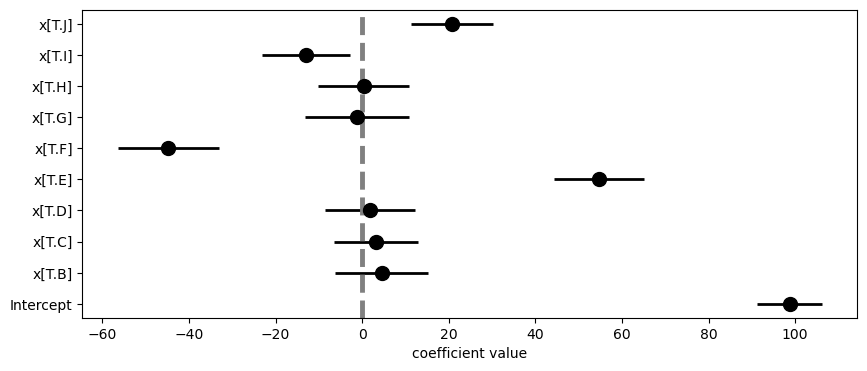

In [44]:
my_coefplot( fit_a )

### Predictions

If we predict with our MODEL it will ONLY predict at the observed CATEGORIES!

In [45]:
input_grid = pd.DataFrame({'x': df.x.unique()})

In [46]:
input_grid

,x
0,A
1,G
2,D
3,C
4,J
5,B
6,I
7,E
8,H
9,F


In [53]:
input_grid.sort_values('x', inplace=True, ignore_index=True)

In [57]:
input_grid

,x
0,A
1,B
2,C
3,D
4,E
5,F
6,G
7,H
8,I
9,J


In [58]:
fit_a.predict( input_grid )

0     98.727693
1    103.201995
2    101.903418
3    100.522801
4    153.381749
5     53.921726
6     97.511650
7     99.046431
8     85.686113
9    119.564021
dtype: float64

In [59]:
df_summary['pred_from_dummies'] = fit_a.predict( input_grid )

In [60]:
df_summary

,x,avg_y,avg_at_xA,relative_difference_to_xA,pred_from_dummies
0,A,98.727693,98.727693,-2.842171e-14,98.727693
1,B,103.201995,98.727693,4.474303e+00,103.201995
2,C,101.903418,98.727693,3.175725e+00,101.903418
3,D,100.522801,98.727693,1.795108e+00,100.522801
4,E,153.381749,98.727693,5.465406e+01,153.381749
5,F,53.921726,98.727693,-4.480597e+01,53.921726
6,G,97.511650,98.727693,-1.216043e+00,97.511650
7,H,99.046431,98.727693,3.187382e-01,99.046431
8,I,85.686113,98.727693,-1.304158e+01,85.686113
9,J,119.564021,98.727693,2.083633e+01,119.564021


### An Alternative

An alternative approach is to REMOVE the intercept. This is known as the ONE-HOT encoding!

REMOVE the INTERCEPT using the `-1` operator in the FORMULA interface!

In [61]:
fit_b = smf.ols(formula= 'y ~ x - 1', data=df).fit()

In [62]:
fit_b.params

x[A]     98.727693
x[B]    103.201995
x[C]    101.903418
x[D]    100.522801
x[E]    153.381749
x[F]     53.921726
x[G]     97.511650
x[H]     99.046431
x[I]     85.686113
x[J]    119.564021
dtype: float64

In [63]:
fit_a.params

Intercept    98.727693
x[T.B]        4.474303
x[T.C]        3.175725
x[T.D]        1.795108
x[T.E]       54.654056
x[T.F]      -44.805967
x[T.G]       -1.216043
x[T.H]        0.318738
x[T.I]      -13.041580
x[T.J]       20.836328
dtype: float64

The estimated coefficients when ONE HOT encoding is used... corresponds DIRECTLY to the AVERAGE OUTPUT per category!

In [64]:
fit_b.params.reset_index(drop=True)

0     98.727693
1    103.201995
2    101.903418
3    100.522801
4    153.381749
5     53.921726
6     97.511650
7     99.046431
8     85.686113
9    119.564021
dtype: float64

In [65]:
df_summary['onehot_coefs'] = pd.Series(fit_b.params.reset_index(drop=True), index=df_summary.index)

In [66]:
df_summary

,x,avg_y,avg_at_xA,relative_difference_to_xA,pred_from_dummies,onehot_coefs
0,A,98.727693,98.727693,-2.842171e-14,98.727693,98.727693
1,B,103.201995,98.727693,4.474303e+00,103.201995,103.201995
2,C,101.903418,98.727693,3.175725e+00,101.903418,101.903418
3,D,100.522801,98.727693,1.795108e+00,100.522801,100.522801
4,E,153.381749,98.727693,5.465406e+01,153.381749,153.381749
5,F,53.921726,98.727693,-4.480597e+01,53.921726,53.921726
6,G,97.511650,98.727693,-1.216043e+00,97.511650,97.511650
7,H,99.046431,98.727693,3.187382e-01,99.046431,99.046431
8,I,85.686113,98.727693,-1.304158e+01,85.686113,85.686113
9,J,119.564021,98.727693,2.083633e+01,119.564021,119.564021


In [67]:
df_summary['pred_from_onehot'] = fit_b.predict( input_grid )

In [68]:
df_summary

,x,avg_y,avg_at_xA,relative_difference_to_xA,pred_from_dummies,onehot_coefs,pred_from_onehot
0,A,98.727693,98.727693,-2.842171e-14,98.727693,98.727693,98.727693
1,B,103.201995,98.727693,4.474303e+00,103.201995,103.201995,103.201995
2,C,101.903418,98.727693,3.175725e+00,101.903418,101.903418,101.903418
3,D,100.522801,98.727693,1.795108e+00,100.522801,100.522801,100.522801
4,E,153.381749,98.727693,5.465406e+01,153.381749,153.381749,153.381749
5,F,53.921726,98.727693,-4.480597e+01,53.921726,53.921726,53.921726
6,G,97.511650,98.727693,-1.216043e+00,97.511650,97.511650,97.511650
7,H,99.046431,98.727693,3.187382e-01,99.046431,99.046431,99.046431
8,I,85.686113,98.727693,-1.304158e+01,85.686113,85.686113,85.686113
9,J,119.564021,98.727693,2.083633e+01,119.564021,119.564021,119.564021


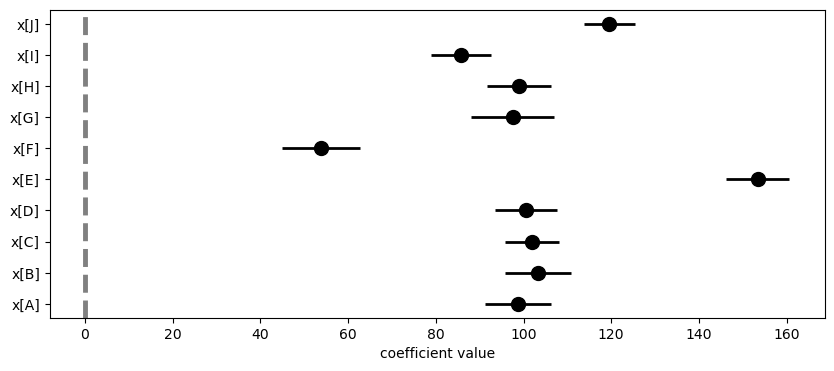

In [69]:
my_coefplot( fit_b )

In [70]:
fit_b.pvalues

x[A]    6.050418e-57
x[B]    2.853747e-59
x[C]    1.336084e-69
x[D]    2.007076e-61
x[E]    2.470158e-83
x[F]    8.918906e-24
x[G]    2.494152e-45
x[H]    6.370110e-59
x[I]    1.221516e-54
x[J]    1.629293e-82
dtype: float64

In [72]:
fit_b.pvalues < 0.05

x[A]    True
x[B]    True
x[C]    True
x[D]    True
x[E]    True
x[F]    True
x[G]    True
x[H]    True
x[I]    True
x[J]    True
dtype: bool